# Boosting이란?
- 여러 개의 약한 **Decision Tree**를 조합해서 사용하는 **Ensemble 기법**중 하나이다
- 즉, 약한 예측 모델들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영하여 강한 예측모델을 만드는 것이다.

# GBM(Gradient Boosting Machine)
- GBM은 여러 개의 **weak learner**를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 가중치의 업데이트 방법은 <b>경사 하강법(Gradient Descent)</b>을 사용한다

# XGBoost 란?
- XGBoost는 Extreme Gradient Boosting의 악자이다.
- boosting기법을 이용하여 구현한 알고리즘은 Gradient Boost가 대표적인데 이 알고리즘을 **병렬학습**이 지원되도록 구현한 라이브러리가 XGBoost이다.
- **Regression, Classifiter 문제를 모두 지원**하며, 성능과 지원 효울이 좋아서 인기 있는 알고리즘이다.
- XGBoost의 장점
  1. GBM 대비 빠른 수행시간 : 병렬 처리로 학습, 분류 속도가 빠르다
  2. 과적합 규제(Regularization) : 표준 GBM 경우 과적합 규제기능이 없으나 , **XGBoost는 자체에 과적합 규제 가능으로 강한 내구성을 지닌다.**
  3. 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘한다.
    - 즉 , CART(Classifier and Regression Tree) 앙상블 모델을 사용한다
  4. Early Stopping(조기 종료) 기능이 있다
  5. 다양한 옵션을 제공하며 Customizing이 용이하다

## 필수 라이브러리

In [4]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='malgun gothic')

# 시각화 차트에 음수설정
mpl.rc('axes', unicode_minus = False)

# 오류경고
warnings.filterwarnings('ignore')



import seaborn as sns

# 차트 스타일지정     글꼴                    음수처리                        눈금
sns.set(font = 'malgun ghthic', rc={'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize=(10, 8))

# 로직스틱 회귀와 평가지표

## 데이터셋 - 위스콘신 유방암 예측

In [2]:
#!pip install xgboost

In [8]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
X = cancer.data
y = cancer.target

cancer_df = pd.DataFrame(data = X, columns = cancer.feature_names)
cancer_df['target'] = y

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
print('data shape : ', X.shape)
print('target shape : ', y.shape)

data shape :  (569, 30)
target shape :  (569,)


In [18]:
# print(cancer.DESCR)

# WDBC-Malignant
# WDBC-Benign

# 0악성False , 1양성 True

In [22]:
# 양성 유방암세트와 음성 유방암스트 개수의 파악
np.unique(cancer.target, return_counts = True)

(array([0, 1]), array([212, 357], dtype=int64))

In [23]:
# 30개의 feature가 뭔지를 확인
for i, feature in enumerate(cancer.feature_names) :
    print(f'feature{(i+1)} : ', feature)

feature1 :  mean radius
feature2 :  mean texture
feature3 :  mean perimeter
feature4 :  mean area
feature5 :  mean smoothness
feature6 :  mean compactness
feature7 :  mean concavity
feature8 :  mean concave points
feature9 :  mean symmetry
feature10 :  mean fractal dimension
feature11 :  radius error
feature12 :  texture error
feature13 :  perimeter error
feature14 :  area error
feature15 :  smoothness error
feature16 :  compactness error
feature17 :  concavity error
feature18 :  concave points error
feature19 :  symmetry error
feature20 :  fractal dimension error
feature21 :  worst radius
feature22 :  worst texture
feature23 :  worst perimeter
feature24 :  worst area
feature25 :  worst smoothness
feature26 :  worst compactness
feature27 :  worst concavity
feature28 :  worst concave points
feature29 :  worst symmetry
feature30 :  worst fractal dimension


## Standarization(표준화)

In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scales = ss.fit_transform(cancer_df.drop('target', axis=1))

## 훈련세트와 트스트세트 분리

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scales, cancer.target, random_state=42)

## 로직스틱 회귀

In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [73]:
# 훈련 모델을 이용하여 5개의 샘플예측

print(lr.predict(X_train[:5]))

[1 0 1 0 0]


- 악성 종양 (malignant) 이 0값으로 1개, 양성종양(bgenign)이 1값으로 4개

In [75]:
# 예측 활률
print(lr.predict_proba(X_train[:5]))

[[3.15093633e-05 9.99968491e-01]
 [9.97033353e-01 2.96664699e-03]
 [7.33100629e-04 9.99266899e-01]
 [9.99996020e-01 3.98033273e-06]
 [9.99998531e-01 1.46883736e-06]]


In [78]:
# classes_ 속성
print(lr.classes_)

[0 1]


In [79]:
# 로지스틱 회귀가 학습한 계수(기울기와 절편) 추출

print(lr.coef_, lr.intercept_)

[[-0.40047319 -0.42002301 -0.35141264 -0.45857397 -0.19431027  0.60368261
  -0.75313073 -1.08134394  0.24303697  0.0882157  -1.25904487  0.22903996
  -0.55497383 -0.90885204 -0.18922479  0.64110343 -0.16319815 -0.39432976
   0.53301572  0.73504954 -0.8375931  -1.32106025 -0.51623822 -0.8232146
  -0.54879811  0.10091389 -1.00984329 -0.78131527 -1.21951368 -0.16004465]] [0.31534282]


In [81]:
# 예측한 5개의 z값을 출력

decisions = lr.decision_function(X_train[:5])
print(decisions)

[ 10.3651943   -5.81735187   7.21749421 -12.43414116 -13.43103791]


In [84]:
from scipy.special import expit
print(expit(decisions))
print(1 - expit(decisions))

[9.99968491e-01 2.96664699e-03 9.99266899e-01 3.98033273e-06
 1.46883736e-06]
[3.15093633e-05 9.97033353e-01 7.33100629e-04 9.99996020e-01
 9.99998531e-01]


In [89]:
# 예측하기
predict = lr.predict(X_test)

### 평가지표
1. 회귀(regression) : MAE, MSE, RMSE, SSE...
2. 분류(classification) : 정확도, 정밀도, 제현율(민감도), F1 score, ROC 커브
3. 클러스터링(Clustering  DBI, 엘보우 메서드, 실루엣 계수

- 편향이 심할때 정확도만 가지고 평가하기 힘들다 여러개 사용해봐야함


In [90]:
# 정확도(Accuracy) : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
# 이진 분류일 경우 데이터에 따라(불균형한 데이터 세트=편향) 모델의 성능이 왜곡될 수 있다.
# 예측 결과가 동일한 데이터건스 / 전체 예측 데이터 건수

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.9790209790209791

## 혼도 행렬

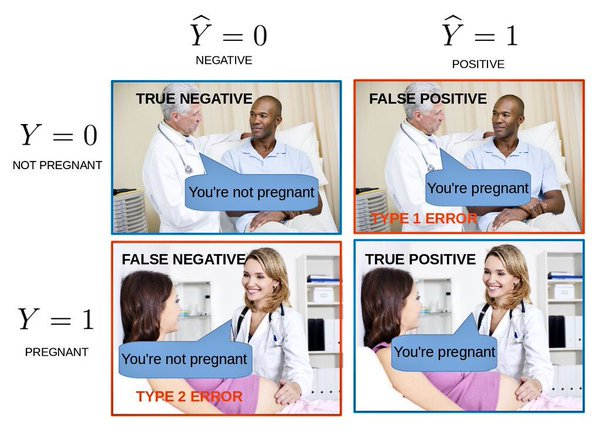

In [92]:
from IPython.display import Image
Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg', width=600)

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)
cm

array([[53,  1],
       [ 2, 87]], dtype=int64)

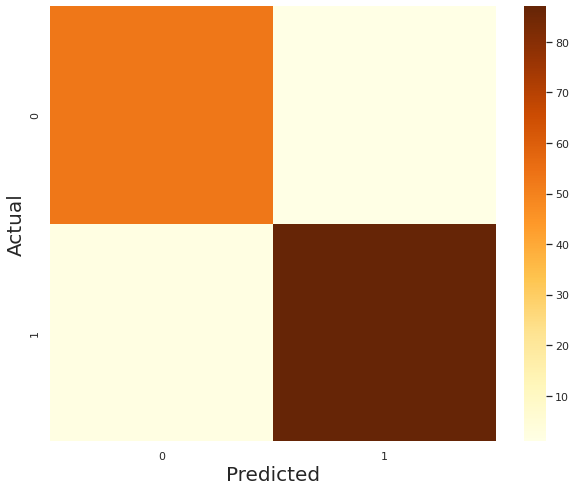

In [162]:
# 혼돈 행렬 시각화
sns.heatmap(cm, annot_kws={'size':20}, cmap='YlOrBr')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.show()

In [103]:
TN, FP, FN, TP = cm.ravel()

### 정밀도(Precision)
- Positive로 예측한 전체 건수에서 옳게 예측한 건수의 비율

In [114]:
precision = TP / (FP+TP)
precision

0.9886363636363636

In [116]:
from sklearn.metrics import precision_score
precision_score(y_test, predict)

0.9886363636363636

### 재현율(Recall) 민감도
- 실제 Positive인 전체 건수에서 옳게 예측한 건수의 비율
- TPR(True Positive Rate)

In [111]:
recall = TP / (FN + TP)
recall

0.9775280898876404

#### F<sub>1</sub> Score
- 재현율과 정밀도의 균을 나타내는 수치

In [117]:
f1 = 2*(precision * recall) / (precision + recall)
f1

0.983050847457627

In [121]:
from sklearn.metrics import f1_score
f1_score(y_test, predict)

0.983050847457627

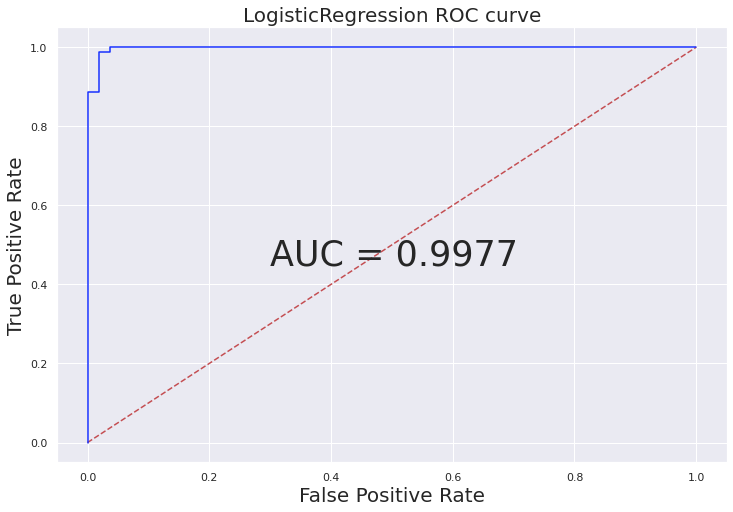

In [125]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(X_test)
y_pred_prob = y_pred_proba[:,1] # 양성(심장병 발병)으로 예측할 확률을 들고온다. 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(12, 8))
plt.plot([0,1], [0,1], "r--")
plt.plot(fpr, tpr, label='LogisticRegression', color = '#162fff')
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title('LogisticRegression ROC curve', size = 20)
plt.text(0.3, 0.45, 'AUC = {}'.format(round(roc_auc_score(y_test, y_pred_prob), 4)), size = 35)
plt.show()

# XGBoost 모델 학습
- 교차검증 제공

In [127]:
# 휸련세트 , 테스트세트 분리
X_train, X_test, y_train, y_test = train_test_split(scales, cancer.target, test_size = 0.2, random_state=156)
#  80%     20%

In [130]:
# 훈련세트, 검증세트
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=156)
# 90%  10%

## 학습, 검증, 테스트용 DMatrix를 생성

In [133]:
import xgboost as xgb


dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

## 하아퍼 파라미터 생성

In [136]:
# 하아퍼 파라미터 생성
# 딕셔너리 형태로 해야함

params = {'max_depth': 3,  # 트기 최대 깊이 (3~10)
          'eta': 0.05,     # 학습률 XGBClassifier인경우 learning_rate 사용해야함
          'objective' : 'binary:logistic', # 예제 데이터가 0 또는 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(vinary:logistic)
          'eval_metric' : 'logloss'}  # 회귀

num_rounds = 400

## 학습

In [142]:
# 학습
# xgboost 모듈의 train()함수에 파라미터로 전달

# 학습 데이터 셋은 'train' 또는 평가 데이터셋은 'eval'로 명가한다
eval_list = [(dtr,'train'),(dval,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round = num_rounds, early_stopping_rounds=50, evals=eval_list)
#                             ?           훈련             반복회수                    조기 중단:(최소50부터)       ?

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

[170]	train-logloss:0.01312	eval-logloss:0.26133
[171]	train-logloss:0.01304	eval-logloss:0.26148
[172]	train-logloss:0.01297	eval-logloss:0.26157
[173]	train-logloss:0.01285	eval-logloss:0.26253
[174]	train-logloss:0.01278	eval-logloss:0.26229
[175]	train-logloss:0.01267	eval-logloss:0.26086
[176]	train-logloss:0.01258	eval-logloss:0.26103


In [146]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시 [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [161]:
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba= None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1 : {:.4f}, AUC : {:.4f}'.format(accuracy,
                                                                                             precision,
                                                                                             recall,
                                                                                             f1, roc_auc))

get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[34  3]
 [ 2 75]]
정확도 : 0.9561, 정밀도 : 0.9615, 재현율 : 0.9740, F1 : 0.9677, AUC : 0.9937


In [1]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)
X=[[-61, 25, 0.62, 0.64, 2, -35, 0.7, 0.65], [2,-5,0.58,0.7,-3,-15,0.65,0.52] ]
y=[ [0.63, 0.64], [0.58,0.61] ]
clf.fit(X,y)

ValueError: Multioutput target data is not supported with label binarization